## Shomate equation
The Shomate equation is used to estimate standart formation enthalpy, entropy and specific heat from fitted parameters commonly available in several databases such as [NIST](https://webbook.nist.gov/cgi/cbook.cgi?ID=C7732185&Type=JANAFL&Table=on). The NIST format is:

$$
C_p^\circ = A + Bt + Ct^2 + Dt^3 + E/t^2\\
H^\circ - H^\circ_{298.15K}= At + Bt^2/2 + Ct^3/3 + Dt^4/4 - E/t + F -H\\
S^\circ = A\ln{t} + Bt + Ct^2/2 + Dt^3/3 -E/(2t^2) + G
$$

with $A$, $B$, $C$, $D$ and $E$ constants, $C_p$ heat capacity in $J/mol K$, $H^\circ$ the standard enthapy in $kJ/mol$, $S^\circ$ standard entropy in $J/molK$ and $t$ as the temperature in $K$ over $1000$ ($t=$temp.$/1000$).

The shomate equation is included in the stego package taking as input a dictionary with the constants and standard values of $H^\circ$ and $S^\circ$.

In [1]:
import stegoplot.kinetics as stg

# Dictionary of Shomate parameters for NH3 in the 298 - 1400 K range 
# taken from: https://webbook.nist.gov/cgi/cbook.cgi?ID=C7664417&Mask=1#Thermo-Gas

NH3_NIST = { 'A':19.99563,'B':49.77119,'C':-15.37599,'D':1.921168,
            'E':0.189174,'F':-53.30667, 'G':203.8591,'H':-45.89806,
            'H0f':-45.90,'S0f':192.77}

# Simple test, enthalpy
temp = 300
stg.shomate_Hf(NH3_NIST, temp) # kJ/mol

-45.8352909948

In [2]:
# Simple test, entropy
stg.shomate_Sf(NH3_NIST, temp) # kJ/mol K

0.19299066656996952

In [3]:
# Simple test, Gibbs free energy
stg.shomate_Gf(NH3_NIST, temp) # kJ/mol

-103.73249096579084

### Reaction example: methanation reaction energies
Below are computed and ploted $\Delta H_{rx}$ and $\Delta G_{rx}$ for the $CO$ methanation reaction, $CO+3H_2 \rightarrow CH_4 + H_2O$, within a temperature range

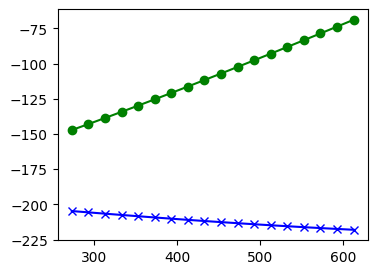

In [4]:
from stegoplot.kinetics import shomate_Gf, shomate_Hf
import matplotlib.pyplot as plt

# Shomate parameters taken from NIST for H2, H2O, CO and CH4
H2_sh = { 'A':33.066178,'B':-11.363417,'C':11.432816,'D':-2.772874,'E':-0.158558,'F':-9.980797,
         'G':172.707974,'H':0.,'H0f':0.,'S0f':130.68}
H2O_sh = { 'A':30.09200, 'B':6.832514, 'C':6.793435, 'D':-2.534480, 'E':0.082139, 'F':-250.8810,
          'G':223.3967, 'H':-241.8264, 'H0f':-241.83, 'S0f':188.84}
CO_sh = { 'A':25.56759, 'B':6.096130, 'C':4.054656, 'D':-2.671301, 'E':0.131021, 'F':-118.0089,
         'G':227.3665, 'H':-110.5271, 'H0f':-110.53, 'S0f':197.66}
CH4_sh = { 'A':-0.703029, 'B':108.4773, 'C':-42.52157, 'D':5.862788, 'E':0.678565, 'F':-76.84376,
          'G':158.7163, 'H':-74.87310, 'H0f':-74.6, 'S0f':186.25}

# Explore CO methanation reaction in the 0 - 350 °C range
T_list = [iT + 273.15 for iT in range(0, 350, 20)]

# Fill lists with the reaction enthalpy (H_ ...) and free energy (G ...) for : CO + 3H2 -> CH4 + H2O
DHrx = [shomate_Hf(CH4_sh, iT) + shomate_Hf(H2O_sh, iT) - 
        shomate_Hf(CO_sh, iT) - 3 * shomate_Hf(H2_sh, iT) for iT in T_list]
DGrx = [shomate_Gf(CH4_sh, iT) + shomate_Gf(H2O_sh, iT) - 
        shomate_Gf(CO_sh, iT) - 3 * shomate_Gf(H2_sh, iT) for iT in T_list]

# plot
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(T_list, DGrx, 'o-', color='g') # green: Gibbs free energy
ax.plot(T_list, DHrx, 'x-', color='b') # blue: enthalpy

plt.show()

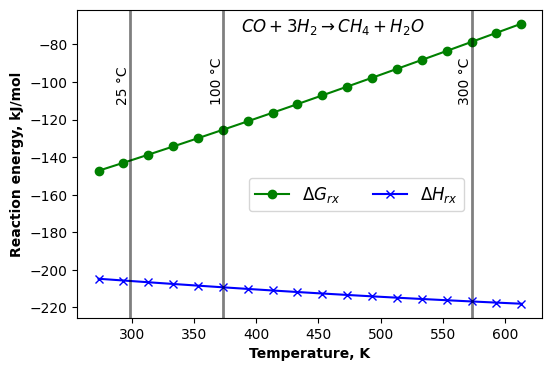

In [5]:
# make the plot look nicer
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(T_list, DGrx, 'o-', color='g', label='$\Delta G_{rx}$')
ax.plot(T_list, DHrx, 'x-', color='b', label='$\Delta H_{rx}$')

ax.set_title(r"$CO+3H_2 \rightarrow CH_4+H_2O$", y=.9, x=.55, fontsize=12, fontweight='bold')

plt.ylabel('Reaction energy, kJ/mol', fontweight='bold')
plt.xlabel('Temperature, K', fontweight='bold')

ax.legend(loc='center right', ncol=2, prop={'size': 12}, bbox_to_anchor=(.85, .4))

# some vertical lines as reference
for iT in [25, 100, 300]:
    ax.axvline(x=iT+273.15, color='k', alpha=0.5, linewidth=2.)
    ax.annotate(str(iT) + ' °C',
                xy=(iT+273.15-5, 0.7), xycoords=("data", "axes fraction"), 
                va="baseline", ha="center", fontsize=10, color='k', rotation=90)

plt.show()